# LASSO

$n$個のサンプルと$m$個の特徴量からなる特徴量の行列$\boldsymbol{X}$を用いて目的変数$\boldsymbol{y}$を近似する線形モデル

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{y} = \b{X} \b{\beta} + \b{e}
$$

を考える。

このモデルのパラメータ$\b{\beta}$の推定の際に、パラメータの絶対値のL1ノルムによって制約条件を設けた下で推定を行う方法が**LASSO**（least absolute shrinkage and selection operator）である

$$
\newcommand{\argmin}{\mathop{\rm arg~min}\limits}
\begin{align}
\hat{\b{\beta}}_{LASSO}
= \ &\argmin_{\b{\beta}} \frac{1}{2} ||\b{X} \b{\beta} - \b{y}||^2 \\
&\text{subject to} \ ||\beta||_1 \leq R
\end{align}
$$

これはラグランジュの未定乗数法を用いて

$$
\hat{\b{\beta}}_{LASSO}
= \argmin_{\b{\beta}} \left\{
 \frac{1}{2} ||\b{X} \b{\beta} - \b{y}||^2 + \lambda ||\beta||_1
\right \}
$$

という問題に転換することができる。

:::{dropdown} 導出

ラグランジュ関数を作る

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
L(\b{\beta}, \lambda) = \frac{1}{2} ||\b{X} \b{\beta} - \b{y}||^2 + \lambda ||\beta||_1
$$

この関数を$\b{\beta}$で偏微分してゼロとなる点が最適解であることが知られている。
:::

## 正則化について

### 正則行列

**正則行列**（regular matrix）、**非特異行列**（non-singular matrix）、あるいは**可逆行列**（invertible matrix）とは、行列の通常の積に関する逆元をもつ正方行列、すなわち、逆行列をもつ正方行列のこと。

:::{card} 定義（正則）

$n$次の正方行列$A$に対して、

$$
AB = BA = I
\hspace{1em} (Iは単位行列)
$$

を満たす$n$次正方行列$B$が存在するとき、$A$は**正則**であるという。

このとき$B$を$A$の**逆行列**といい、$A^{-1}$のように表記される。
:::


### 正則化

- サンプルサイズ$n$よりも特徴量の次元数$m$のほうが多い場合
- 説明変数感の相関が非常に高い

と言った状況では、通常最小二乗法の解

$$
\hat{\b{\beta}}_{OLS} = (\b{X}^\top \b{X})^{-1} \b{X}^\top \b{y}
$$

の$(\b{X}^\top \b{X})$が正則にならず、逆行列が計算できない、あるいはうまく推定できなくなってしまう問題がある。

そこでLASSOのような手法によって正則化する方法が提案されたため、**正則化**（regularization）という言葉が使われる


## Oracle Property

Fan and Li は，変数選択における望ましい性質と
して，

- 変数選択の一致性：サンプルサイズ n が大きくなるとき，0 でない係数（$\beta_j = 0$）を持つ説明変数が正しく選択される確率が 1 に収束する，
-  漸近正規性：0 でない係数を持つ説明変数に対する推定量は，漸近正規性を持つ，

というオラクル性（Oracle property）を提案した．
https://orsj.org/wp-content/corsj/or58-5/or58_5_261.pdf

[Fan, J., & Li, R. (2001). Variable selection via nonconcave penalized likelihood and its oracle properties. Journal of the American statistical Association, 96(456), 1348-1360.](http://www.personal.psu.edu/ril4/research/penlike.pdf)


これの対応としてAdaptive LASSOなどが開発された


## Adaptive LASSO

## Rigorous LASSO

A. Belloni, D. Chen, V. Chernozhukov and C. Hansen (2012). Sparse models and methods for optimal instruments with an application to eminent domain. Econometrica 80 (6), 2369-2429.

https://arxiv.org/pdf/1010.4345.pdf

A. Belloni, V. Chernozhukov and C. Hansen (2013). Inference for high-dimensional sparse econometric models. In Advances in Economics and Econometrics: 10th World Congress, Vol. 3: Econometrics, Cambirdge University Press: Cambridge, 245-295.

https://arxiv.org/pdf/1201.0220.pdf

["rigorous" lassoを試してみた - 琥珀色呑んだくれ備忘録](https://kato-kohaku-0.hatenablog.com/entry/2016/03/11/013338)

# Heterogeneous effect

## Pliable Lasso

[Tibshirani, R., & Friedman, J. (2020). A pliable lasso. Journal of Computational and Graphical Statistics, 29(1), 215-225.](https://arxiv.org/pdf/1712.00484.pdf)

# 欠損対応

## HMLasso

Interpretable Machine Learningの和訳を行っていた[HACARUS INC.](https://hacarus.com/ja/sparse-modeling-benefits/) のメンバーが執筆した『[ITエンジニアのためのスパースモデリング入門](https://www.amazon.co.jp/dp/B099RYMYXG)』

[最先端のスパースモデリング～HMLassoとPliable Lasso～ (1/2)：CodeZine（コードジン）](https://codezine.jp/article/detail/12662)

> 東芝と統計数理研究所によって開発されたのが、欠損値を含む問題に対する新しいLASSOである「HMLasso」

Takada, Masaaki, Hironori Fujisawa, and Takeichiro Nishikawa. "HMLasso: lasso with high missing rate." arXiv preprint arXiv:1811.00255 (2018).
> 

https://arxiv.org/pdf/1811.00255.pdf

## 参考

- [Hastie, T., Tibshirani, R., & Wainwright, M. (2015). Statistical learning with sparsity: the lasso and generalizations. CRC press.](https://hastie.su.domains/StatLearnSparsity_files/SLS.pdf)

## テキトーにモンテカルロシミュレーション

Lassoは正則化パラメータを強めにかけるとそのぶんバイアスは入る

In [158]:
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

true_coefs = np.array([0.01, 0.1, 0.3, 0.5, 0.9, 1])

def gen_data(n = 300, seed = 0):
    np.random.seed(seed)
    d = len(true_coefs)
    X = np.random.uniform(0, 1, size=(n, d))
    X[:, 0] = 1
    y = X @ true_coefs + np.random.normal(size=n, scale=1)
    return X, y


ols_coefs = []
alphas = [0.01, 0.005]
n_alpha = len(alphas)
lasso_coefs_list = []
for _ in range(n_alpha):
    lasso_coefs_list.append([])

n_trial = 500
for k in range(n_trial):
    X, y = gen_data(seed=k)

    for l in range(n_alpha):
        lasso = Lasso(alpha=alphas[l])
        lasso.fit(X, y)
        lasso_coefs_list[l].append(lasso.coef_)

    ols = LinearRegression()
    ols.fit(X, y)
    ols_coefs.append(ols.coef_)

for i in range(n_alpha):
    lasso_coefs_list[i] = np.array(lasso_coefs_list[i])
ols_coefs = np.array(ols_coefs)

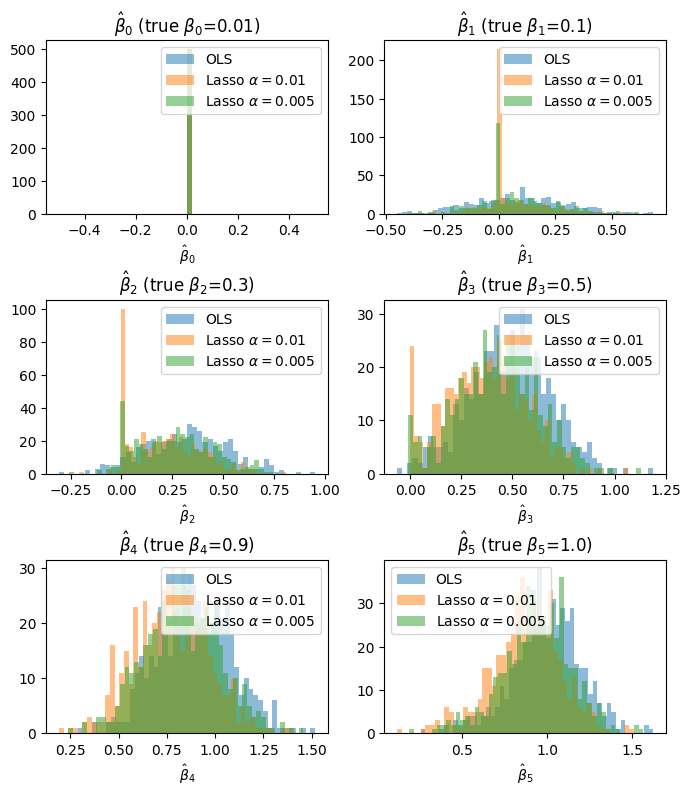

In [159]:
n_features = ols_coefs.shape[1]
col_idx = 0
ncols = 2
nrows = int(np.ceil(n_features / ncols))

fig, axes = plt.subplots(figsize=[ncols * 4, nrows * 3], ncols=ncols, nrows=nrows)
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()
for col_idx in range(n_features):
    axes[col_idx].hist(ols_coefs[:, col_idx], bins=50, label="OLS", alpha=0.5)
    for l in range(n_alpha):
        lasso_coefs = lasso_coefs_list[l]
        axes[col_idx].hist(lasso_coefs[:, col_idx], bins=50, label=fr"Lasso $\alpha={alphas[l]}$", alpha=0.5)
    axes[col_idx].set(xlabel=fr"$\hat\beta_{col_idx}$", title=fr"$\hat\beta_{col_idx}$ (true $\beta_{col_idx}$={true_coefs[col_idx]})")
    axes[col_idx].legend()
# fig.suptitle(f"lasso alpha={alpha}")
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


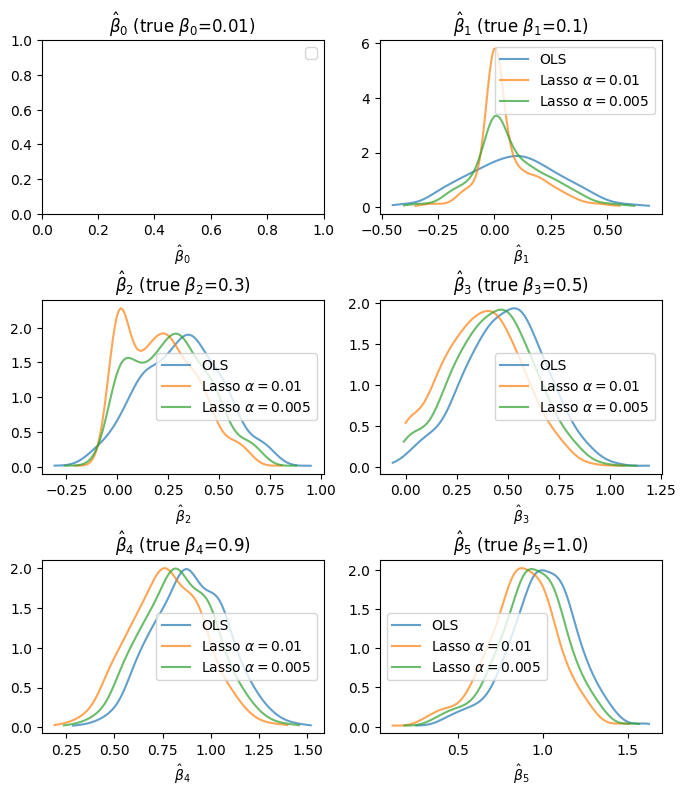

In [160]:
from scipy.stats import norm, gaussian_kde

def kdeplot(data, ax, label=None):
    try:
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), 100)
        y = kde.evaluate(x)
        ax.plot(x, y, label=label, alpha=0.7)
    except:
        pass
    return ax

n_features = ols_coefs.shape[1]
col_idx = 0
ncols = 2
nrows = int(np.ceil(n_features / ncols))

fig, axes = plt.subplots(figsize=[ncols * 4, nrows * 3], ncols=ncols, nrows=nrows)
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()
for col_idx in range(n_features):
    kdeplot(ols_coefs[:, col_idx], ax=axes[col_idx], label="OLS")
    for l in range(n_alpha):
        lasso_coefs = lasso_coefs_list[l]
        kdeplot(lasso_coefs[:, col_idx], ax=axes[col_idx], label=fr"Lasso $\alpha={alphas[l]}$")

    axes[col_idx].set(xlabel=fr"$\hat\beta_{col_idx}$", title=fr"$\hat\beta_{col_idx}$ (true $\beta_{col_idx}$={true_coefs[col_idx]})")
    axes[col_idx].legend()
# fig.suptitle(f"lasso alpha={alpha}")
fig.show()